## EDA & Imputation

This script will be used to house our EDA and Imputation.  First, we will do some EDA before imputation to see which variables are worth using and then do imputation and look at some EDA after

In [117]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")
%matplotlib inline

In [118]:
# Load in final dataframe without imputed values
final_df = pd.read_json("output/final_df.json")
final_df['join_key'] = final_df['city_key'].str.cat(final_df['state_key'])

print("# of MSA's: %i" %len(final_df['join_key'].unique()))
final_df['num_years'] = final_df.groupby('join_key')['year'].transform(len) 
# Fow now we are taking those that have all years
full_msa = final_df.num_years >= 10

# of MSA's: 401


In [82]:
# Quick to look at differences between full MSA and non
def compare_msa(var, ax, max_value):
    ax.hist(final_df.loc[full_msa, var], range=(0, max_value), alpha=0.5, label='11')
    ax.hist(final_df.loc[~full_msa, var], range=(0, max_value), alpha=0.5, label='<11')
    ax.set_title("%s Histogram" %var)
    ax.legend();

C:\Users\blake\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\blake\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


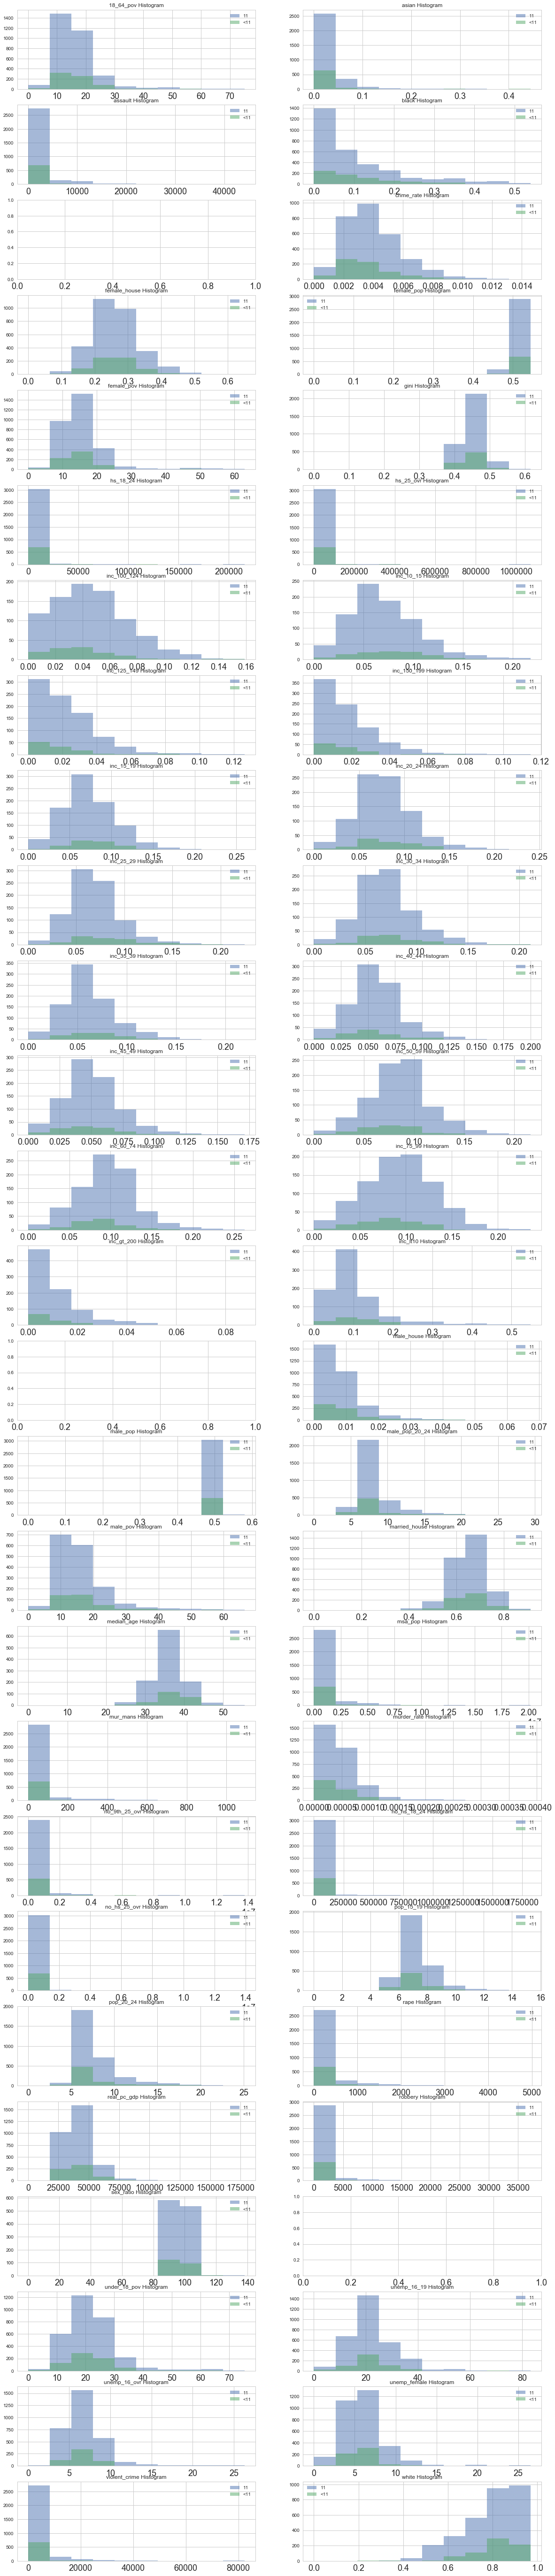

In [71]:
# Look at Differences for MSA that have all years and ones that do not
fig, ax = plt.subplots(27,2, figsize=(20,100))
ax = ax.flatten()
for i, v in enumerate(final_df.columns):
    if v not in ['city_key', 'MSA', 'state_key', 'join_key', 'year', 'num_years']:
        max_v = final_df.loc[:, v].max()
        compare_msa(v, ax[i], max_v)

Based on the above plots there is no clear sytematic difference between those that have 11 and those that do not. Because our rolling window cross validation needs lots of years, we are going to keep the dataframes that have all 11 years

In [119]:
final_df = final_df.loc[full_msa, :]
del final_df['num_years']
print(final_df.shape)

(3091, 55)


In [50]:
"""
Function
-------
x_y_scatter

This function plots a scatter plot between two variables with
certain stylings
"""
def x_y_scatter(x_var, y_var, x_label, y_label, title, ax):
    ax.scatter(x_var, y_var, color='teal', alpha=0.5)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14);

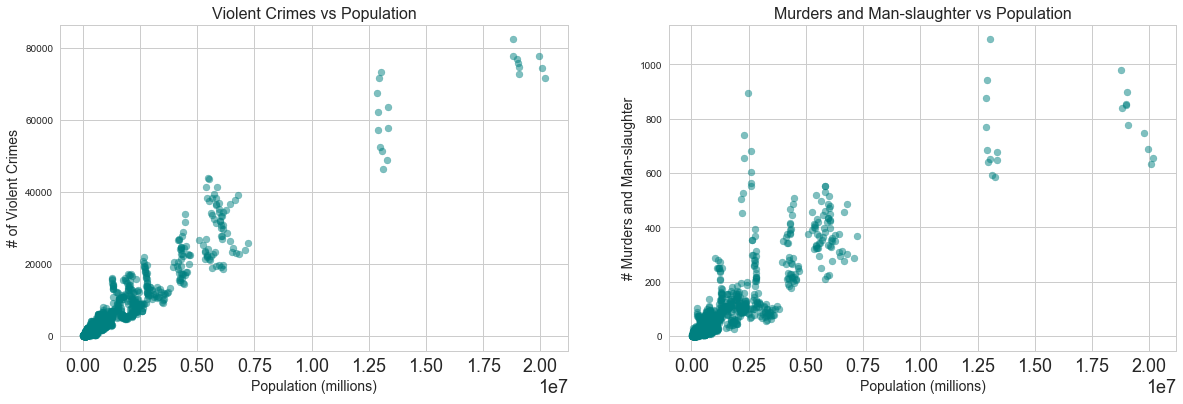

In [73]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
x_y_scatter(final_df['msa_pop'],
           final_df['violent_crime'],
           x_label='Population (millions)',
           y_label='# of Violent Crimes',
           title='Violent Crimes vs Population',
           ax=ax[0])
x_y_scatter(final_df['msa_pop'],
           final_df['mur_mans'],
           x_label='Population (millions)',
           y_label='# Murders and Man-slaughter',
           title='Murders and Man-slaughter vs Population',
           ax=ax[1])

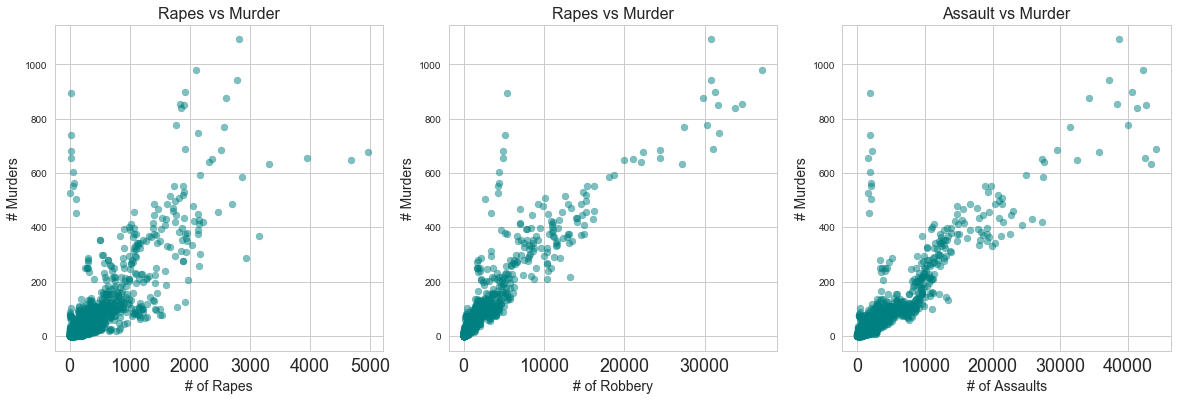

In [74]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3,figsize=(20,6))

# Rape
x_y_scatter(final_df['rape'],
           final_df['mur_mans'],
           x_label='# of Rapes',
           y_label='# Murders',
           title='Rapes vs Murder',
           ax=ax[0])

# Robbery
x_y_scatter(final_df['robbery'],
           final_df['mur_mans'],
           x_label='# of Robbery',
           y_label='# Murders',
           title='Rapes vs Murder',
           ax=ax[1])
# Assault
x_y_scatter(final_df['assault'],
           final_df['mur_mans'],
           x_label='# of Assaults',
           y_label='# Murders',
           title='Assault vs Murder',
           ax=ax[2])

label_size = 13
matplotlib.rcParams['xtick.labelsize'] = label_size
plt.savefig('Murder Other crimes', bbox_inches='tight')

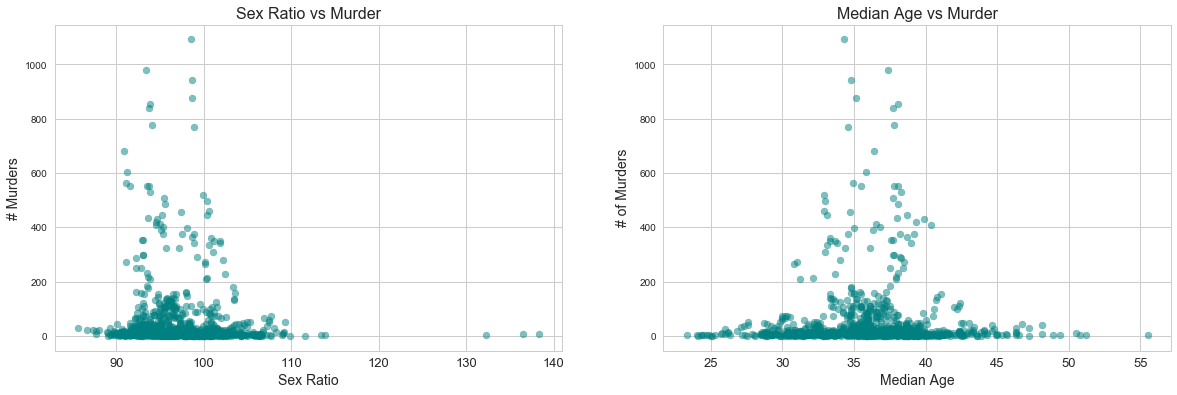

In [53]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
x_y_scatter(final_df['sex_ratio'],
           final_df['mur_mans'],
           x_label='Sex Ratio',
           y_label='# Murders',
           title='Sex Ratio vs Murder',
           ax=ax[0])
x_y_scatter(final_df['median_age'],
           final_df['mur_mans'],
           x_label='Median Age',
           y_label='# of Murders',
           title='Median Age vs Murder',
           ax=ax[1])

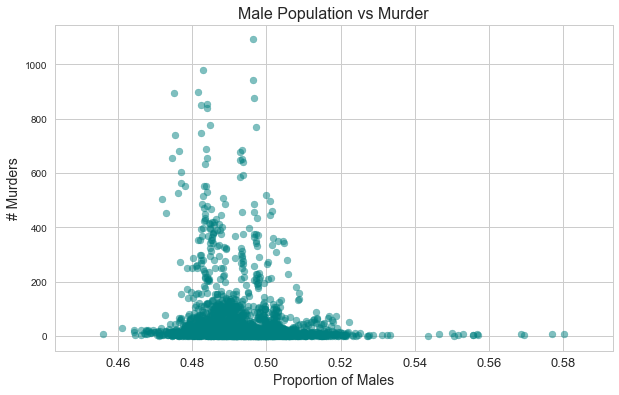

In [54]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
x_y_scatter(final_df['male_pop'],
           final_df['mur_mans'],
           x_label='Proportion of Males',
           y_label='# Murders',
           title='Male Population vs Murder',
           ax=ax)

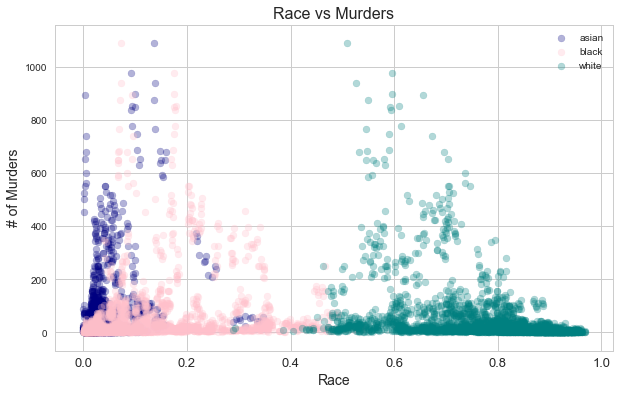

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(final_df['asian'], final_df['mur_mans'], color='navy', alpha=0.3, label='asian')
ax.scatter(final_df['black'], final_df['mur_mans'], color='pink', alpha=0.3, label='black')
ax.scatter(final_df['white'], final_df['mur_mans'], color='teal', alpha=0.3, label='white')
ax.set_title('Race vs Murders', fontsize=16)
ax.set_xlabel('Race', fontsize=14)
ax.set_ylabel('# of Murders', fontsize=14)
ax.legend();

### Unemployment Rate

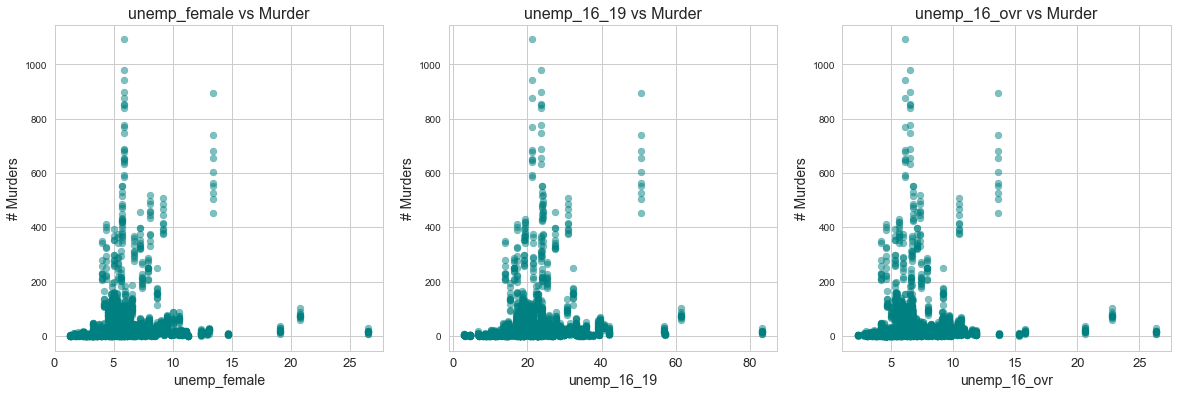

In [56]:
un_emp_vars = ['unemp_female', 'unemp_16_19', 'unemp_16_ovr']
fig, ax = plt.subplots(1,3,figsize=(20,6))
for i, v in enumerate(un_emp_vars):
    x_y_scatter(final_df[v],
           final_df['mur_mans'],
           x_label=v,
           y_label='# Murders',
           title='%s vs Murder' %v,
           ax=ax[i])

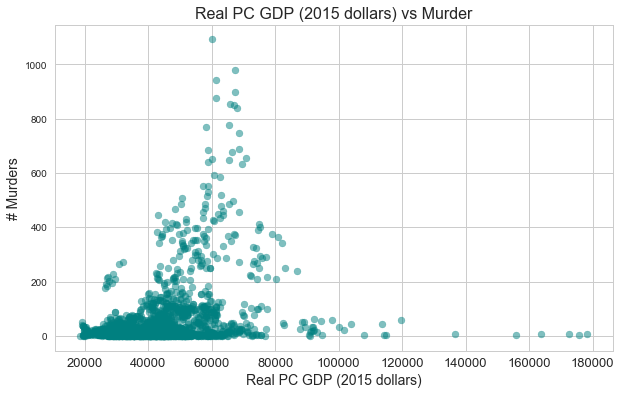

In [57]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
x_y_scatter(final_df['real_pc_gdp'],
           final_df['mur_mans'],
           x_label='Real PC GDP (2015 dollars)',
           y_label='# Murders',
           title='Real PC GDP (2015 dollars) vs Murder',
           ax=ax)

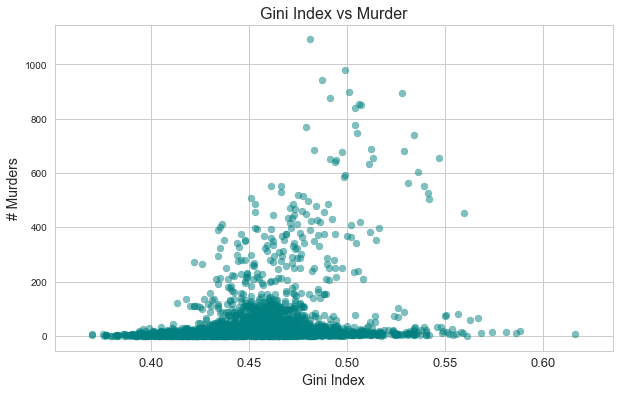

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
x_y_scatter(final_df['gini'],
           final_df['mur_mans'],
           x_label='Gini Index',
           y_label='# Murders',
           title='Gini Index vs Murder',
           ax=ax)
#ax.set_ylim(100,1100);

### Head of Household

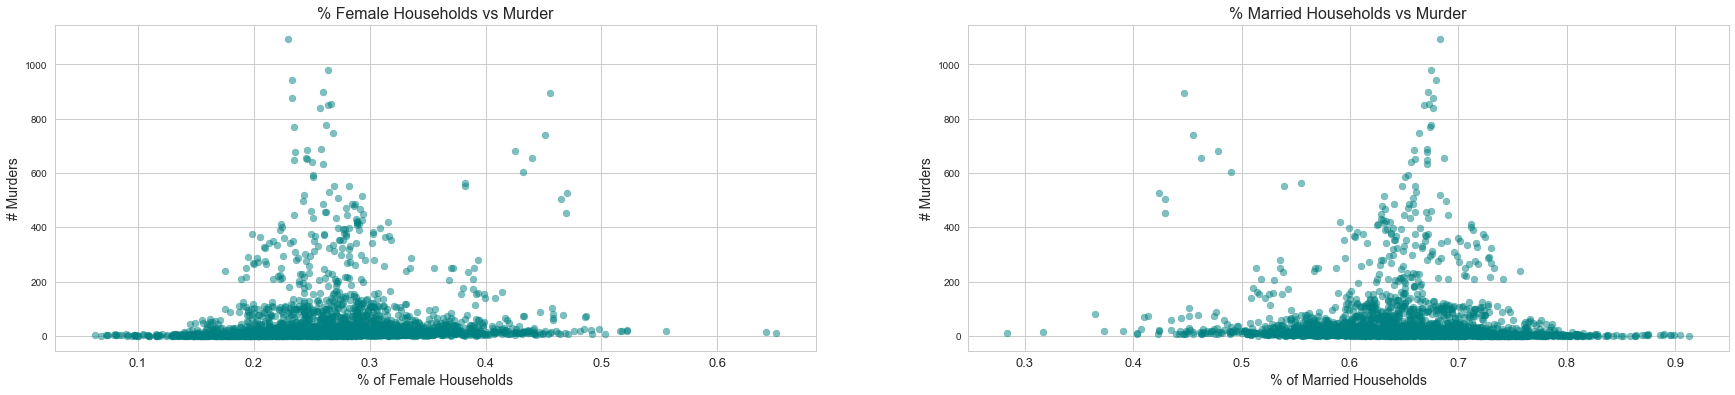

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(30,6))
x_y_scatter(final_df['female_house'],
           final_df['mur_mans'],
           x_label='% of Female Households',
           y_label='# Murders',
           title='% Female Households vs Murder',
           ax=ax[0])

x_y_scatter(final_df['married_house'],
           final_df['mur_mans'],
           x_label='% of Married Households',
           y_label='# Murders',
           title='% Married Households vs Murder',
           ax=ax[1])

In [60]:
'''
Function
----------
scatter_list_murder

This function takes a list of variables and plots each one vs murder

Parameter list:
    var_list - list of strings to plot
    nrows - # of rows in the grid
    ncols - # of cols in grid
    figsize- tuple for figsize

'''
def scatter_list_murder(var_list, nrows, ncols, figsize, log_trans=False):
    fig, ax = plt.subplots(nrows,ncols,figsize=(20,16))
    ax = ax.flatten()
    for i, v in enumerate(var_list):
        if log_trans:
            var = np.log(final_df[v])
            label= "Log(" + v + ")"
        else:
            var = final_df[v]
            label = v
            
        
        x_y_scatter(var,
               final_df['mur_mans'],
               x_label=label,
               y_label='# Murders',
               title='%s vs Murder' %v,
               ax=ax[i])
    fig.tight_layout();

### Education

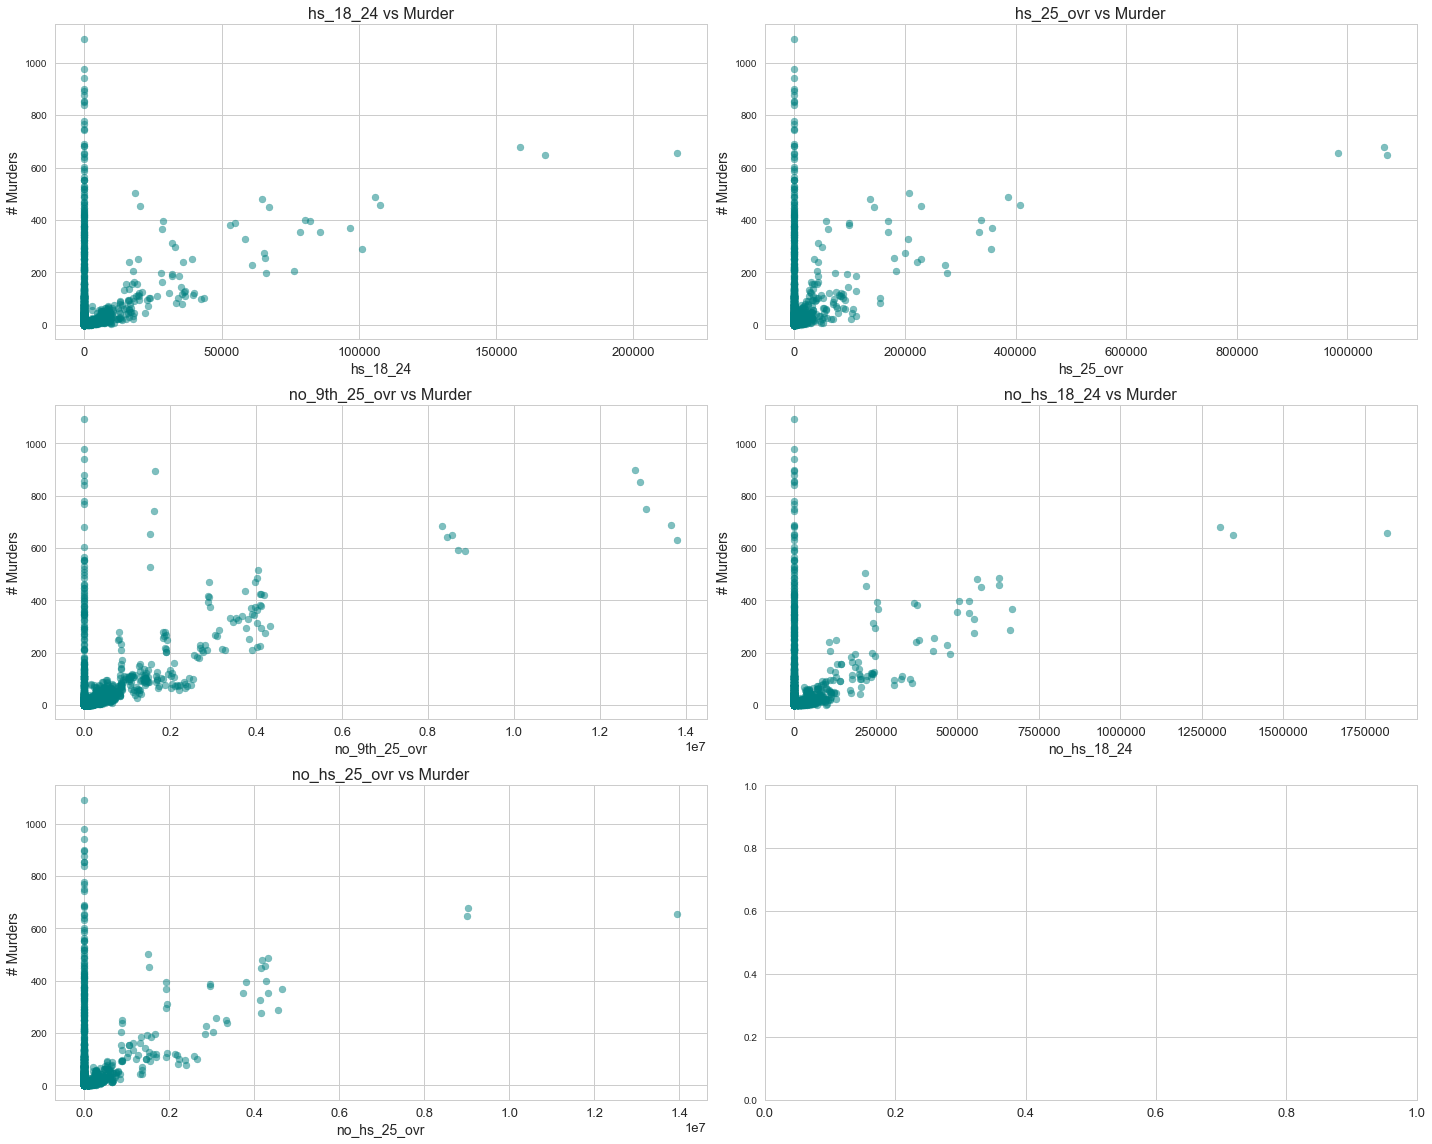

In [61]:
scatter_list_murder(['hs_18_24', 'hs_25_ovr', 'no_9th_25_ovr', 
                     'no_hs_18_24', 'no_hs_25_ovr'],
                    3, 2, (20, 16))

### Poverty

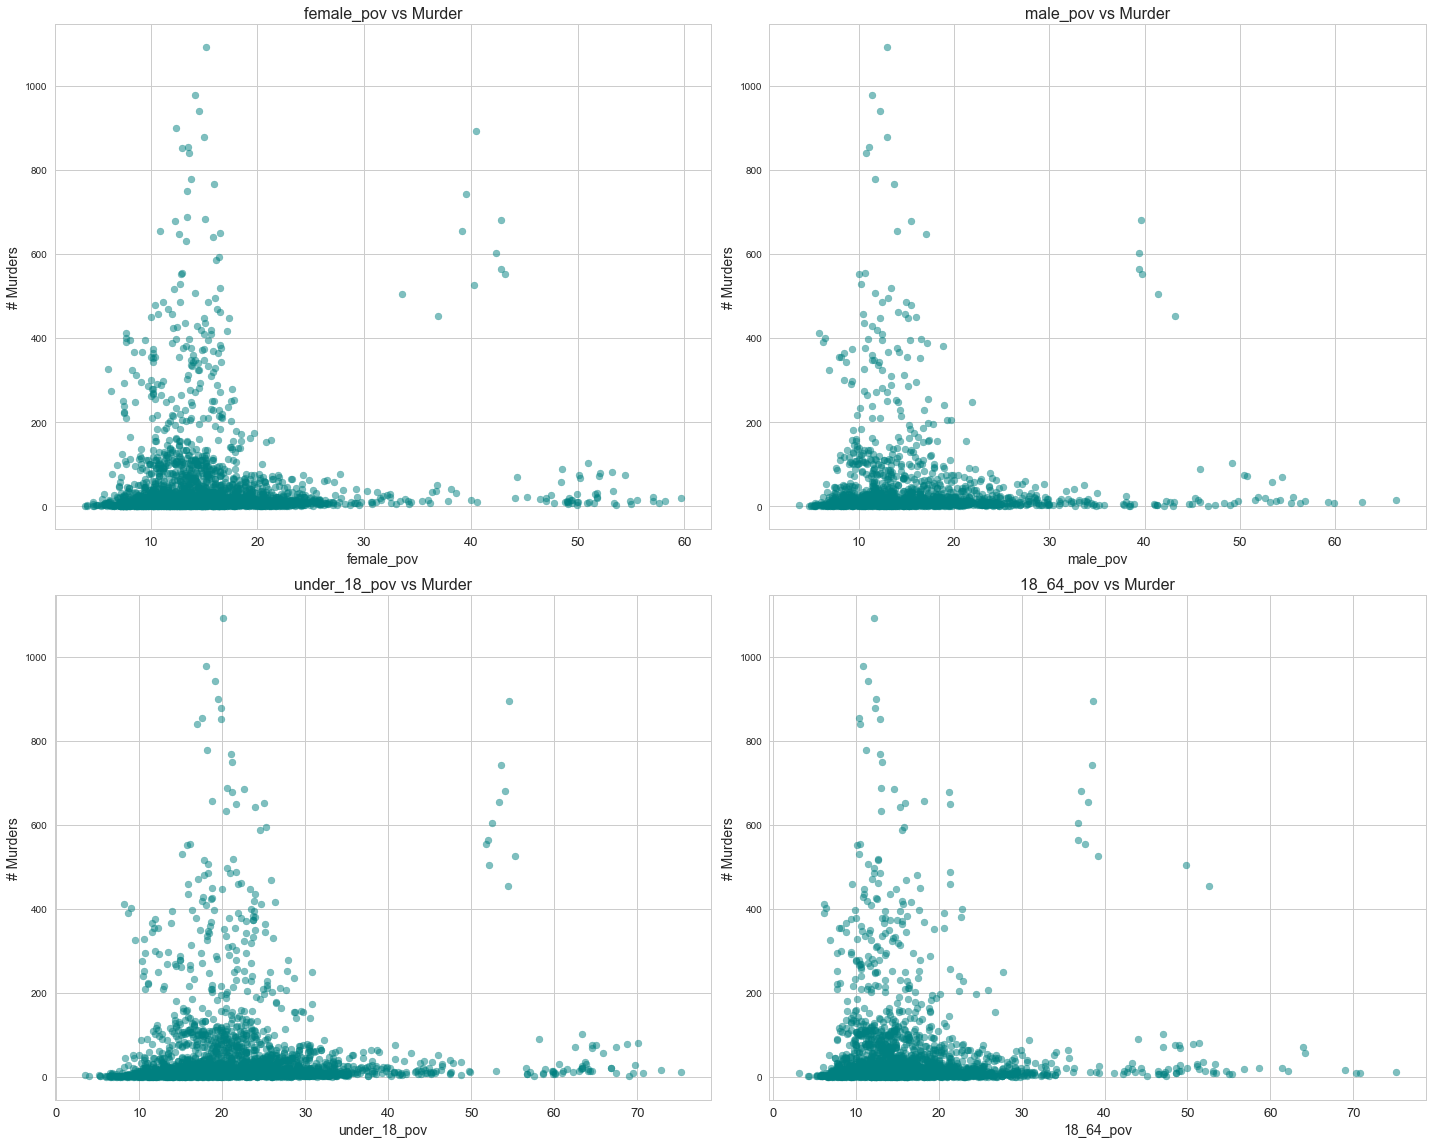

In [62]:
scatter_list_murder(['female_pov', 'male_pov', 'under_18_pov', '18_64_pov'],
                    2, 2, (20, 16), log_trans=False)

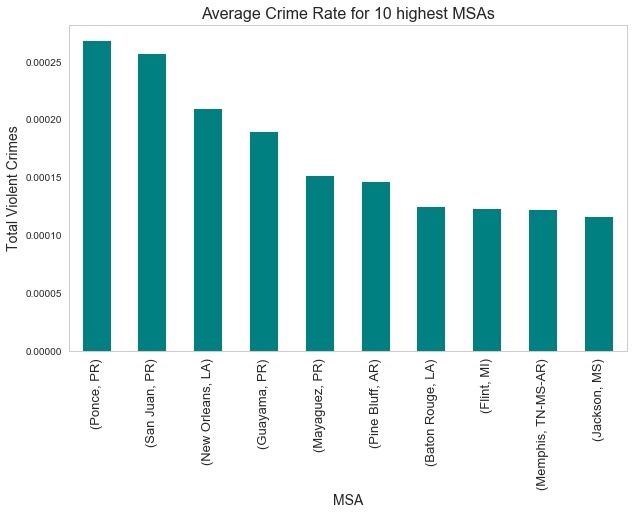

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#ax=plt_df[plt_df['year']==2016].groupby('join_key')['violent_crime'].sum().sort_values(ascending=False).iloc[0:10].plot(kind='bar',color='teal',grid=False)
ax = final_df.groupby(['city_key', 'state_key'])['murder_rate'].mean().sort_values(
    ascending=False).iloc[0:10].plot(kind='bar', color='teal', grid=False)
ax.set_title('Average Crime Rate for 10 highest MSAs', fontsize=16)
ax.set_xlabel('MSA', fontsize=14)
ax.set_ylabel('Total Violent Crimes',fontsize=14);

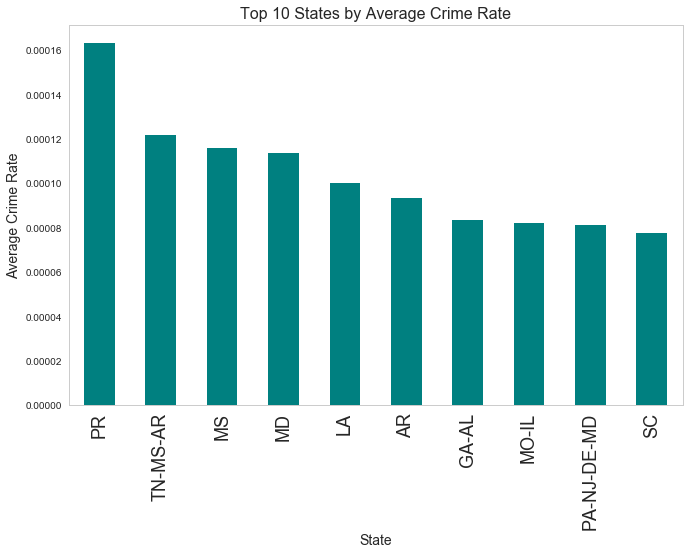

In [64]:
year=2016
label_size = 18
matplotlib.rcParams['xtick.labelsize'] = label_size 
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax=final_df.groupby('state_key')['murder_rate'].mean().sort_values(
    ascending=False).iloc[0:10].plot(kind='bar',grid=False, color='teal')
ax.set_title('Top 10 States by Average Crime Rate', fontsize=16)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Average Crime Rate',fontsize=14)
plt.savefig('State_vs_Avg_Crime_rate', bbox_inches='tight')

In [120]:
# We feel that we can only impute bariables where 25 % or less is missing.
# You need sufficient data in order to make validd imputation.
for v in final_df.columns:
    miss_pct =  np.sum(final_df[v].isnull()) / final_df.shape[0]
    if miss_pct > 0.25:
          del final_df[v]

Here is multiple approaches we are taking for imputation.  Our general approach will be linear interpolation   We will use the previous period's value to impute the current value while adjusting for population growth and using the current MSAs fixed effect. 

This equation is what will be used to impute a variable denoted Y<sub>t</sub>

 $$Y_t = B_0 + B_1 Y_{t-1} + B_2 \frac{Pop_t}{Pop_{t-1}} + B_3 MSA_i $$
 
 We will train the above model where have data and then iteratively fill Y<sub>t</sub> until all are predicted (ie if 2008 an 2009 values are missing. We will train model on all other years, predict 2008 and then predict 2009 using the predicted value for 2008.
 
Now there are may still be missing values for observations with missing history (ex 2006). In this case we we will use the following scheme:

 $$Y_t = Y_{t+1} * \frac{Pop_t}{Pop_{t+1}} $$
 
 
 Imputation Approach # 2:
 
 $$Y_t = Y_{t-n/t+n} * \frac{Pop_t}{Pop_{t-n/t+n}} $$

In this second approch, we will do simple population adjustment. n represents the number of missing periods we have to go to find the first non-missing data. First, we will go to first lag period (one year before). If that is missing, we will go to year after. Then, two years before then two years after etc

In [121]:
final_df = final_df.sort_values(['join_key', 'year'])
final_df.head()

,18_64_pov,asian,assault,black,city_key,crime_rate,female_house,female_pop,female_pov,gini,...,real_pc_gdp,robbery,state_key,under_18_pov,unemp_16_19,unemp_16_ovr,unemp_female,violent_crime,white,year
0,14.9,0.014292,448.0,0.068295,Abilene,0.003919,0.253355,0.502283,16.1,0.443,...,33978.0,109.0,TX,20.4,23.1,6.6,5.2,638.0,0.741838,2006
1,12.7,0.013504,462.0,0.073019,Abilene,0.004743,0.247283,0.502223,17.7,0.426,...,34883.0,173.0,TX,23.7,23.1,6.6,5.2,748.0,0.841607,2007
2,15.2,0.011149,426.0,0.073232,Abilene,0.004496,0.229557,0.497619,18.6,0.461,...,35663.0,188.0,TX,22.0,23.1,6.6,5.2,716.0,0.843099,2008
3,13.9,0.013577,454.0,0.067082,Abilene,0.004642,0.277810,0.507731,15.6,0.424,...,33920.0,146.0,TX,19.3,23.1,6.6,5.2,741.0,0.807389,2009
4,17.8,0.010210,476.0,0.074948,Abilene,0.004230,0.317965,0.498645,15.7,0.459,...,34004.0,116.0,TX,22.0,23.1,6.6,5.2,675.0,0.843283,2010


#### Implementing Imputation Approach # 1

In [137]:
# Get Population Rate Change

# Generate lag given varname and number of periods
gen_lags = lambda var, num: final_df.groupby(['join_key'])[var].shift(num)


#  Get Lag Year Difference
final_df = final_df.sort_values(['join_key', 'year'])
final_df['lag_year_diff'] = (final_df.year -  gen_lags('year', 1))
print(final_df['lag_year_diff'].value_counts())

# Get Lag Population
final_df['lag1_pop_change' ] = final_df['msa_pop'] / gen_lags('msa_pop', 1)
final_df.loc[not_one_year_diff, 'lag1_pop_change'] = np.nan

# Get Lead Year Difference
final_df['lead_year_diff'] = (final_df.year -  gen_lags('year', -1))
print(final_df['lead_year_diff'].value_counts())


print(np.sum( (final_df['lag_year_diff'] == 2.0) & (final_df['lead_year_diff'] == -2.0)))
# We only want 1 period lags for now
#not_one_year_diff = final_df['lag_year_diff'] != 1.0
#final_df['lag1_pop_change' ] = final_df['msa_pop'] / gen_lags('msa_pop', 1)
#final_df.loc[not_one_year_diff, 'lag1_pop_change'] = np.nan
final_df.loc[:, ['join_key', 'year', 'msa_pop', 'lag_year_diff', 'lead_year_diff']].head(100)

1.0    2740
2.0      63
Name: lag_year_diff, dtype: int64
-1.0    2740
-2.0      63
Name: lead_year_diff, dtype: int64
0


,join_key,year,msa_pop,lag_year_diff,lead_year_diff
0,AbileneTX,2006,162776.0,NaN,-1.0
1,AbileneTX,2007,157713.0,1.0,-1.0
2,AbileneTX,2008,159257.0,1.0,-1.0
3,AbileneTX,2009,159632.0,1.0,-1.0
4,AbileneTX,2010,159566.0,1.0,-1.0
5,AbileneTX,2011,168729.0,1.0,-1.0
6,AbileneTX,2012,168908.0,1.0,-1.0
7,AbileneTX,2013,168117.0,1.0,-1.0
8,AbileneTX,2014,169202.0,1.0,-1.0
9,AbileneTX,2015,169713.0,1.0,-1.0


In [124]:
# Imputation Approach # 1
for v in final_df.columns:
    if v not in ['lag_year_diff', 'lag1_pop_change']
    # If this MSA-variable combination has values that need to be imputed
    if np.sum(final_df.loc[:, v].isnull()) > 0:
        lag_v = 'lag_%s' %v
        # First get lag_value
        final_df[lag_v] = gen_lags(v, 1)
        # Set equal to missing if gap of more than 1
        final_df.loc[not_one_year_diff, lag_v] = np.nan
        
        # Split into Train and Test
        MSA_vars = [v for v in final_df.columns if 'MSA' in v]
        x_vars = MSA_vars +  [lag_v]
        
        miss = final_df.lag_v_isnull() || final_df.v.isnull()
        xtrain = final_df.loc[~miss, x_vars]
        xtest = final-df.loc[miss, x_vars]
        
        ytrain = [~miss, v]
        ytest = [miss, v]
        lin_reg = LinearRegression().fit(xtrain, ytrain)
        
        
        lin_reg.fit(tr_set.loc[:, v], tr_set.loc[:])
        lin_reg.fit(tr_set.loc[:, ''])
    lassoCV.fit(xtrain, ytrain)
        
        print(v)
            
        

18_64_pov
asian
assault
black
crime_rate
female_house
female_pop
female_pov
gini
hs_18_24
hs_25_ovr
male_house
male_pop
male_pop_20_24
married_house
msa_pop
murder_rate
no_9th_25_ovr
no_hs_18_24
no_hs_25_ovr
pop_15_19
pop_20_24
rape
real_pc_gdp
under_18_pov
unemp_16_19
unemp_16_ovr
unemp_female
violent_crime
white
lag_year_diff
lag1_pop_change


#### Implementing Imputation Approach # 2